In [2]:
import pandas as pd
import dateutil


In [3]:

data = pd.read_csv('phone_data.csv')
 #transformer les chaines de caractères en format date lisible
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

In [14]:
data

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [17]:
#phone call duration
data['duration'][data['item'] == 'call'].sum()

92321.0

In [18]:
data['item'].value_counts()

call    388
sms     292
data    150
Name: item, dtype: int64

In [19]:
data['item'].nunique()

3

In [ ]:
#learning group by functions

In [20]:
data.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [23]:
#avoir la duree des appels par mois
data.groupby(['month'])['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [28]:
# le nombre d'entrees par mois
data.groupby(['month'])['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [25]:
#sommme des appels des pour chaque reseau
data[data['item'] == 'call'].groupby(['network'])['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [29]:
data.groupby(['month','item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [30]:
data.groupby(['month','item'])

In [31]:
data.groupby(['month','item'])['date']

In [ ]:
#fonction d'agreggation



In [32]:
data.groupby('month')[['duration']].sum()

duration
month             
2014-11  26639.441
2014-12  14641.870
2015-01  18223.299
2015-02  15522.299
2015-03  22750.441

In [35]:
data.groupby('month', as_index=False).agg({"duration": "sum"})

month   duration
0  2014-11  26639.441
1  2014-12  14641.870
2  2015-01  18223.299
3  2015-02  15522.299
4  2015-03  22750.441

In [37]:
data.groupby(['month','item'],as_index=False).agg({
    
    'duration': "sum",
    'network': "count",
    'date': "first"
    
})

month  item   duration  network                date
0   2014-11  call  25547.000      107 2014-10-15 06:58:00
1   2014-11  data    998.441       29 2014-10-15 06:58:00
2   2014-11   sms     94.000       94 2014-10-16 22:18:00
3   2014-12  call  13561.000       79 2014-11-14 17:24:00
4   2014-12  data   1032.870       30 2014-11-13 06:58:00
5   2014-12   sms     48.000       48 2014-11-14 17:28:00
6   2015-01  call  17070.000       88 2014-12-15 20:03:00
7   2015-01  data   1067.299       31 2014-12-13 06:58:00
8   2015-01   sms     86.000       86 2014-12-15 19:56:00
9   2015-02  call  14416.000       67 2015-01-15 10:36:00
10  2015-02  data   1067.299       31 2015-01-13 06:58:00
11  2015-02   sms     39.000       39 2015-01-15 12:23:00
12  2015-03  call  21727.000       47 2015-02-12 20:15:00
13  2015-03  data    998.441       29 2015-02-13 06:58:00
14  2015-03   sms     25.000       25 2015-02-19 18:46:00

In [ ]:
#it is possible to define aggregation outside

In [45]:
aggregations = {
    
    'duration': 'sum',
    'date': 'first'
}

In [46]:
data.groupby('month',as_index=False).agg(aggregations)

month   duration                date
0  2014-11  26639.441 2014-10-15 06:58:00
1  2014-12  14641.870 2014-11-13 06:58:00
2  2015-01  18223.299 2014-12-13 06:58:00
3  2015-02  15522.299 2015-01-13 06:58:00
4  2015-03  22750.441 2015-02-12 20:15:00

In [ ]:
#create variables inside agg function

In [50]:
data.groupby('month',as_index=False).agg(
    total_duration = ('duration',sum),
    first_date = ('date',max)
)

total_duration  first_date
0        2014-11   26639.441
1        2014-12   14641.870
2        2015-01   18223.299
3        2015-02   15522.299
4        2015-03   22750.441

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         830 non-null    int64         
 1   date          830 non-null    datetime64[ns]
 2   duration      830 non-null    float64       
 3   item          830 non-null    object        
 4   month         830 non-null    object        
 5   network       830 non-null    object        
 6   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 45.5+ KB


In [53]:
#suppression des doublons
data.drop_duplicates(inplace=True)

In [55]:
data.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [56]:
data.head(
)

index                date  duration  item    month   network network_type
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [59]:
data.columns = ['INDEX','date','duration','item','month','network','network_type']

In [60]:
data.head()

INDEX                date  duration  item    month   network network_type
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [ ]:
#comprehension de listes : mettre tous les noms des colonnes en majuscules

In [61]:
data.columns = [col.upper() for col in data]

In [62]:
data.head()

INDEX                DATE  DURATION  ITEM    MONTH   NETWORK NETWORK_TYPE
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [63]:
data.columns = [col.lower() for col in data]

In [64]:
data.head()

index                date  duration  item    month   network network_type
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [76]:
data.isnull()

index   date  duration   item  month  network  network_type
0    False  False     False  False  False    False         False
1    False  False     False  False  False    False         False
2    False  False     False  False  False    False         False
3    False  False     False  False  False    False         False
4    False  False     False  False  False    False         False
..     ...    ...       ...    ...    ...      ...           ...
825  False  False     False  False  False    False         False
826  False  False     False  False  False    False         False
827  False  False     False  False  False    False         False
828  False  False     False  False  False    False         False
829  False  False     False  False  False    False         False

[830 rows x 7 columns]

In [77]:
#pour compter le nombre de valeur manquantes 
nbVmquantes = data.isnull().sum()
print("nombre de valeurs manquantes : {valeur}".format(valeur = nbVmquantes))

nombre de valeurs manquantes : index           0
date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64


In [78]:
#supprimer les valeurs nulles
data.dropna() # supprime toute ligne avec une valeur nulle et ne modifie pas le dataframe d'origine

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [79]:
#pour supprimer des colonnes avec des  valeurs nulles
data.dropna(axis=1)

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [ ]:
#imputation :  comment conserver les donnees bien qu'elles aient des valeurs manquantes?

In [80]:
#remplir les vides avec la moyenne
duration_mean = data['duration'].mean()
data.fillna(duration_mean,inplace=False)

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [81]:
data.corr() # obtenir les correlations entre chaque variable

index  duration
index     1.000000  0.040768
duration  0.040768  1.000000

In [82]:
data

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [85]:
duration = data.iloc[1]
duration

index                             1
date            2014-10-15 06:58:00
duration                         13
item                           call
month                       2014-11
network                    Vodafone
network_type                 mobile
Name: 1, dtype: object

In [86]:
duration = data.iloc[1:3]
duration

index                date  duration  item    month   network network_type
1      1 2014-10-15 06:58:00      13.0  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00      23.0  call  2014-11    Meteor       mobile

In [87]:
duration = data.iloc[1:4,1:3]
duration

date  duration
1 2014-10-15 06:58:00      13.0
2 2014-10-15 14:46:00      23.0
3 2014-10-15 14:48:00       4.0

In [91]:
duration = data.iloc[:,-(1:3)]
duration

SyntaxError: invalid syntax (<ipython-input-91-84bc1b8e8291>, line 1)

In [92]:
data.head()

index                date  duration  item    month   network network_type
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [96]:
data[ data['duration'] > 30  & data['item'] == 'call' ]

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [97]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv')

In [98]:
movies_df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

In [111]:
def rating_function(x):
    if x > 8.0:
        return "good movie"
    else:
        return "bad movie"

In [113]:
movies_df['rating_category'] = movies_df['Rating'].apply(rating_function)

In [105]:
movies_df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [114]:
movies_df['rating_category']

0      good movie
1       bad movie
2       bad movie
3       bad movie
4       bad movie
          ...    
995     bad movie
996     bad movie
997     bad movie
998     bad movie
999     bad movie
Name: rating_category, Length: 1000, dtype: object

In [115]:
movies_df['Rank'].plot(kind ='hist',title ='Rating')

In [116]:
movies_df['Rank'].describe()

count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: Rank, dtype: float64

In [117]:
movies_df['Rank'].plot(kind ='box',title ='Rating')

In [122]:
correlations = movies_df.corr()


Rank  Year  Runtime (Minutes)    Rating     Votes  \
Rank                 1.0   NaN                NaN       NaN       NaN   
Year                 NaN   1.0                NaN       NaN       NaN   
Runtime (Minutes)    NaN   NaN                1.0       NaN       NaN   
Rating               NaN   NaN                NaN  1.000000  0.511537   
Votes                NaN   NaN                NaN  0.511537  1.000000   
Revenue (Millions)   NaN   NaN                NaN       NaN  0.639661   
Metascore            NaN   NaN                NaN  0.631897       NaN   

                    Revenue (Millions)  Metascore  
Rank                               NaN        NaN  
Year                               NaN        NaN  
Runtime (Minutes)                  NaN        NaN  
Rating                             NaN   0.631897  
Votes                         0.639661        NaN  
Revenue (Millions)            1.000000        NaN  
Metascore                          NaN   1.000000

In [124]:
movies_df.loc[:, 'Rank':'Genre']

Rank                    Title                     Genre
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi
1       2               Prometheus  Adventure,Mystery,Sci-Fi
2       3                    Split           Horror,Thriller
3       4                     Sing   Animation,Comedy,Family
4       5            Suicide Squad  Action,Adventure,Fantasy
..    ...                      ...                       ...
995   996     Secret in Their Eyes       Crime,Drama,Mystery
996   997          Hostel: Part II                    Horror
997   998   Step Up 2: The Streets       Drama,Music,Romance
998   999             Search Party          Adventure,Comedy
999  1000               Nine Lives     Comedy,Family,Fantasy

[1000 rows x 3 columns]

In [125]:
#renommage
movies_df.rename(columns = {'Rank' : 'rank'})

rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  \
0                  121     8.1  757074              333.13       76.0   
1                  124     7.0  485820              126.46       65.0   
2                  117     7.3  157606              138.12       62.0   
3                  108     7.2   60545              270.32       59.0   
4                  123     6.2  393727              325.02       40.0   
..                 ...     ...     ...                 ...        ...   
995                111     6.2   27585                 NaN       45.0   
996                 94     5.5   73152               17.54       46.0   
997                 98     6.2   70699               58.01       50.0   
998                 93     5.6    4881                 NaN       22.0   
999                 87     5.3   12435               19.64       11.0   

    rating_category  
0        good movie  
1         bad movie  
2         bad movie  
3         bad movie  
4         bad movie  
..              ...  
995       bad movie  
996       bad movie  
997       bad movie  
998       bad movie  
999       bad movie  

[1000 rows x 13 columns]

In [126]:
data.head()

index                date  duration  item    month   network network_type
0      0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile

In [127]:
data.reset_index()

level_0  index                date  duration  item    month   network  \
0          0      0 2014-10-15 06:58:00    34.429  data  2014-11      data   
1          1      1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone   
2          2      2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor   
3          3      3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco   
4          4      4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco   
..       ...    ...                 ...       ...   ...      ...       ...   
825      825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world   
826      826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone   
827      827    827 2015-03-13 06:58:00    34.429  data  2015-03      data   
828      828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world   
829      829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world   

    network_type  
0           data  
1         mobile  
2         mobile  
3         mobile  
4         mobile  
..           ...  
825        world  
826       mobile  
827         data  
828        world  
829        world  

[830 rows x 8 columns]

In [128]:
data.plot.scatter(x="duration",y="network")

In [129]:
data.plot.hist()

ValueError: view limit minimum -526.3999999999999 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -526.3999999999999 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [130]:
data

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

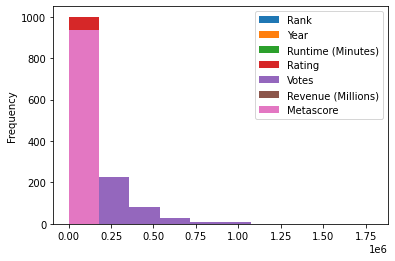

In [132]:
movies_df.plot.hist(['Rank'])

In [133]:
movies_df

Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
995  A tight-knit team of rising investigators, alo...             Billy Ray   
996  Three American college students studying abroa...              Eli Roth   
997  Romantic sparks occur between two dance studen...            Jon M. Chu   
998  A pair of friends embark on a mission to reuni...        Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  \
0                  121     8.1  757074              333.13       76.0   
1                  124     7.0  485820              126.46       65.0   
2                  117     7.3  157606              138.12       62.0   
3                  108     7.2   60545              270.32       59.0   
4                  123     6.2  393727              325.02       40.0   
..                 ...     ...     ...                 ...        ...   
995                111     6.2   27585                 NaN       45.0   
996                 94     5.5   73152               17.54       46.0   
997                 98     6.2   70699               58.01       50.0   
998                 93     5.6    4881                 NaN       22.0   
999                 87     5.3   12435               19.64       11.0   

    rating_category  
0        good movie  
1         bad movie  
2         bad movie  
3         bad movie  
4         bad movie  
..              ...  
995       bad movie  
996       bad movie  
997       bad movie  
998       bad movie  
999       bad movie  

[1000 rows x 13 columns]

In [135]:
movies_df.rank(method='first')

ValueError: first not supported for non-numeric data

In [137]:
data.sample(n=10)

index                date  duration  item    month   network network_type
806    806 2015-03-03 09:59:00   355.000  call  2015-03     Three       mobile
530    530 2015-01-06 09:04:00     1.000   sms  2015-01     Three       mobile
773    773 2015-02-26 16:38:00   570.000  call  2015-03  Vodafone       mobile
270    270 2014-11-21 11:50:00    34.000  call  2014-12     Three       mobile
463    463 2014-12-25 06:58:00    34.429  data  2015-01      data         data
224    224 2014-11-12 19:01:00     7.000  call  2014-11  Vodafone       mobile
549    549 2015-01-08 22:41:00     1.000   sms  2015-01  Vodafone       mobile
695    695 2015-02-06 18:39:00    23.000  call  2015-02     Three       mobile
604    604 2015-01-16 18:07:00     1.000   sms  2015-02  Vodafone       mobile
195    195 2014-11-10 14:59:00    13.000  call  2014-11     Three       mobile

In [140]:
data.sample(frac=0.1)

index                date  duration  item    month    network  \
283    283 2014-11-23 16:10:00     107.0  call  2014-12      Three   
729    729 2015-02-12 20:15:00      69.0  call  2015-03   landline   
331    331 2014-11-30 11:45:00       1.0   sms  2014-12      Three   
643    643 2015-01-23 15:37:00       1.0   sms  2015-02   Vodafone   
454    454 2014-12-24 13:22:00       4.0  call  2015-01      Three   
..     ...                 ...       ...   ...      ...        ...   
629    629 2015-01-21 15:56:00      27.0  call  2015-02  voicemail   
262    262 2014-11-21 01:13:00       1.0   sms  2014-12   Vodafone   
223    223 2014-11-12 17:59:00    1001.0  call  2014-11      Three   
671    671 2015-01-31 12:48:00      31.0  call  2015-02      Tesco   
233    233 2014-11-14 17:28:00       1.0   sms  2014-12   Vodafone   

    network_type  
283       mobile  
729     landline  
331       mobile  
643       mobile  
454       mobile  
..           ...  
629    voicemail  
262       mobile  
223       mobile  
671       mobile  
233       mobile  

[83 rows x 7 columns]

In [143]:
data.nlargest(10,'duration')

index                date  duration  item    month   network network_type
816    816 2015-03-04 12:29:00   10528.0  call  2015-03  landline     landline
742    742 2015-02-17 19:09:00    2328.0  call  2015-03     Three       mobile
252    252 2014-11-19 18:56:00    2120.0  call  2014-12     Three       mobile
59      59 2014-10-23 08:34:00    1940.0  call  2014-11  landline     landline
648    648 2015-01-25 16:55:00    1863.0  call  2015-02     Three       mobile
398    398 2014-12-17 18:08:00    1859.0  call  2015-01  Vodafone       mobile
31      31 2014-10-18 13:10:00    1714.0  call  2014-11     Three       mobile
809    809 2015-03-03 14:34:00    1325.0  call  2015-03  Vodafone       mobile
548    548 2015-01-08 20:31:00    1247.0  call  2015-01     Three       mobile
105    105 2014-10-31 13:27:00    1234.0  call  2014-11     Tesco       mobile

In [144]:
regex = '^Tesco'
data.filter(regex=regex)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[830 rows x 0 columns]

In [145]:
data

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [146]:
data.shift(1)

index                date  duration  item    month   network network_type
0      NaN                 NaT       NaN   NaN      NaN       NaN          NaN
1      0.0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
2      1.0 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
3      2.0 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
4      3.0 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825  824.0 2015-03-12 06:58:00    34.429  data  2015-03      data         data
826  825.0 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
827  826.0 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
828  827.0 2015-03-13 06:58:00    34.429  data  2015-03      data         data
829  828.0 2015-03-14 00:13:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [147]:
data

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[830 rows x 7 columns]

In [148]:
data.shift(-1)

index                date  duration  item    month   network network_type
0      1.0 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
1      2.0 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
2      3.0 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
3      4.0 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
4      5.0 2014-10-15 18:55:00     4.000  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
825  826.0 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
826  827.0 2015-03-13 06:58:00    34.429  data  2015-03      data         data
827  828.0 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
828  829.0 2015-03-14 00:16:00     1.000   sms  2015-03     world        world
829    NaN                 NaT       NaN   NaN      NaN       NaN          NaN

[830 rows x 7 columns]

In [149]:
data.tail()

index                date  duration  item    month   network network_type
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

In [151]:
data[data['item'].isin(['sms','data'])]

index                date  duration  item    month   network network_type
0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
6        6 2014-10-16 06:58:00    34.429  data  2014-11      data         data
11      11 2014-10-16 22:18:00     1.000   sms  2014-11    Meteor       mobile
12      12 2014-10-16 22:21:00     1.000   sms  2014-11    Meteor       mobile
13      13 2014-10-17 06:58:00    34.429  data  2014-11      data         data
..     ...                 ...       ...   ...      ...       ...          ...
825    825 2015-03-13 00:38:00     1.000   sms  2015-03     world        world
826    826 2015-03-13 00:39:00     1.000   sms  2015-03  Vodafone       mobile
827    827 2015-03-13 06:58:00    34.429  data  2015-03      data         data
828    828 2015-03-14 00:13:00     1.000   sms  2015-03     world        world
829    829 2015-03-14 00:16:00     1.000   sms  2015-03     world        world

[442 rows x 7 columns]

In [154]:
data.sample(n=10).reset_index()

level_0  index                date  duration  item    month   network  \
0      619    619 2015-01-19 20:08:00    53.000  call  2015-02     Tesco   
1       71     71 2014-10-24 13:48:00     1.000   sms  2014-11  Vodafone   
2       98     98 2014-10-30 14:31:00   463.000  call  2014-11  Vodafone   
3      118    118 2014-11-02 21:42:00   169.000  call  2014-11    Meteor   
4      241    241 2014-11-18 08:29:00     1.000   sms  2014-12  Vodafone   
5      372    372 2014-12-08 06:58:00    34.429  data  2014-12      data   
6       44     44 2014-10-19 20:25:00   428.000  call  2014-11     Three   
7      556    556 2015-01-09 09:25:00     1.000   sms  2015-01    Meteor   
8       42     42 2014-10-19 16:21:00    23.000  call  2014-11     Three   
9      346    346 2014-12-04 06:58:00    34.429  data  2014-12      data   

  network_type  
0       mobile  
1       mobile  
2       mobile  
3       mobile  
4       mobile  
5         data  
6       mobile  
7       mobile  
8       mobile  
9         data

In [158]:
is_long = pd.Series(data.duration >= 53)
is_long

0      False
1      False
2      False
3      False
4      False
       ...  
825    False
826    False
827    False
828    False
829    False
Name: duration, Length: 830, dtype: bool

In [160]:
data[is_long]

index                date  duration  item    month   network network_type
7        7 2014-10-16 15:01:00     602.0  call  2014-11     Three       mobile
8        8 2014-10-16 15:12:00    1050.0  call  2014-11     Three       mobile
10      10 2014-10-16 16:21:00    1183.0  call  2014-11     Three       mobile
19      19 2014-10-17 17:26:00      92.0  call  2014-11     Three       mobile
21      21 2014-10-17 17:30:00     375.0  call  2014-11     Tesco       mobile
..     ...                 ...       ...   ...      ...       ...          ...
807    807 2015-03-03 10:12:00     745.0  call  2015-03  Vodafone       mobile
808    808 2015-03-03 10:27:00      57.0  call  2015-03  Vodafone       mobile
809    809 2015-03-03 14:34:00    1325.0  call  2015-03  Vodafone       mobile
810    810 2015-03-03 18:36:00     768.0  call  2015-03     Three       mobile
816    816 2015-03-04 12:29:00   10528.0  call  2015-03  landline     landline

[214 rows x 7 columns]

In [165]:
data[(data.duration >= 50) & (data.network.isin(['Three','Vodafone']))]

index                date  duration  item    month   network network_type
7        7 2014-10-16 15:01:00     602.0  call  2014-11     Three       mobile
8        8 2014-10-16 15:12:00    1050.0  call  2014-11     Three       mobile
10      10 2014-10-16 16:21:00    1183.0  call  2014-11     Three       mobile
19      19 2014-10-17 17:26:00      92.0  call  2014-11     Three       mobile
30      30 2014-10-18 13:08:00     101.0  call  2014-11  Vodafone       mobile
..     ...                 ...       ...   ...      ...       ...          ...
806    806 2015-03-03 09:59:00     355.0  call  2015-03     Three       mobile
807    807 2015-03-03 10:12:00     745.0  call  2015-03  Vodafone       mobile
808    808 2015-03-03 10:27:00      57.0  call  2015-03  Vodafone       mobile
809    809 2015-03-03 14:34:00    1325.0  call  2015-03  Vodafone       mobile
810    810 2015-03-03 18:36:00     768.0  call  2015-03     Three       mobile

[103 rows x 7 columns]

In [171]:
data.groupby(['network']).duration.agg(['count','min','max','mean'])

count     min        max        mean
network                                        
Meteor        87   1.000   1090.000   83.137931
Tesco         84   1.000   1234.000  164.773810
Three        215   1.000   2328.000  170.004651
Vodafone     215   1.000   1859.000   68.697674
data         150  34.429     34.429   34.429000
landline      42   3.000  10528.000  438.880952
special        3   1.000      1.000    1.000000
voicemail     27   1.000    174.000   65.740741
world          7   1.000      1.000    1.000000

In [170]:
%matplotlib inline

In [173]:
data.groupby(['network']).duration.agg(['count','min','max','mean']).plot(kind='bar')

In [ ]:
#apply, map, applymap

In [174]:
movies_df.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore rating_category  
0     8.1  757074              333.13       76.0      good movie  
1     7.0  485820              126.46       65.0       bad movie  
2     7.3  157606              138.12       62.0       bad movie  
3     7.2   60545              270.32       59.0       bad movie  
4     6.2  393727              325.02       40.0       bad movie

In [180]:
movies_df['rating_quality'] = movies_df.rating_category.map({'good movie': 1, 'bad movie': 0})

In [181]:
movies_df.loc[0:4, :]

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore rating_category  \
0     8.1  757074              333.13       76.0      good movie   
1     7.0  485820              126.46       65.0       bad movie   
2     7.3  157606              138.12       62.0       bad movie   
3     7.2   60545              270.32       59.0       bad movie   
4     6.2  393727              325.02       40.0       bad movie   

   rating_quality  
0               1  
1               0  
2               0  
3               0  
4               0

In [182]:
 import numpy as np

In [189]:
movies_df.loc[:,'Rating':'Votes'].apply(max,axis=1)

0      757074.0
1      485820.0
2      157606.0
3       60545.0
4      393727.0
         ...   
995     27585.0
996     73152.0
997     70699.0
998      4881.0
999     12435.0
Length: 1000, dtype: float64

In [190]:
#get which colum is the maximum
movies_df.loc[:,'Rating':'Votes'].apply(np.argmax,axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Length: 1000, dtype: int64

In [193]:
movies_df.loc[:,'Rating':'Votes'].applymap(int)

Rating   Votes
0         8  757074
1         7  485820
2         7  157606
3         7   60545
4         6  393727
..      ...     ...
995       6   27585
996       5   73152
997       6   70699
998       5    4881
999       5   12435

[1000 rows x 2 columns]

In [194]:
from sklearn.datasets import load_iris

ModuleNotFoundError: No module named 'sklearn'

In [200]:
durations = data.groupby(['network','item']).duration.mean()

In [201]:
durations.index

MultiIndex([(   'Meteor', 'call'),
            (   'Meteor',  'sms'),
            (    'Tesco', 'call'),
            (    'Tesco',  'sms'),
            (    'Three', 'call'),
            (    'Three',  'sms'),
            ( 'Vodafone', 'call'),
            ( 'Vodafone',  'sms'),
            (     'data', 'data'),
            ( 'landline', 'call'),
            (  'special',  'sms'),
            ('voicemail', 'call'),
            (    'world',  'sms')],
           names=['network', 'item'])

In [206]:
durations.unstack()

item             call    data  sms
network                           
Meteor     133.333333     NaN  1.0
Tesco      194.760563     NaN  1.0
Three      284.875000     NaN  1.0
Vodafone   221.530303     NaN  1.0
data              NaN  34.429  NaN
landline   438.880952     NaN  NaN
special           NaN     NaN  1.0
voicemail   65.740741     NaN  NaN
world             NaN     NaN  1.0

In [208]:
data.pivot_table(values='duration',index='network',columns='item')

item             call    data  sms
network                           
Meteor     133.333333     NaN  1.0
Tesco      194.760563     NaN  1.0
Three      284.875000     NaN  1.0
Vodafone   221.530303     NaN  1.0
data              NaN  34.429  NaN
landline   438.880952     NaN  NaN
special           NaN     NaN  1.0
voicemail   65.740741     NaN  NaN
world             NaN     NaN  1.0

In [213]:
# multi index dataframe
# issue : how to do selection from a multi index dataframe ?
TT=data.set_index(['network','item']) 
TT.sort_index(inplace=True)
TT

index                date  duration    month network_type
network item                                                           
Meteor  call      2 2014-10-15 14:46:00      23.0  2014-11       mobile
        call     60 2014-10-23 09:45:00     281.0  2014-11       mobile
        call     65 2014-10-23 17:48:00     263.0  2014-11       mobile
        call     84 2014-10-26 21:22:00      28.0  2014-11       mobile
        call    100 2014-10-30 20:02:00       4.0  2014-11       mobile
...             ...                 ...       ...      ...          ...
world   sms     370 2014-12-07 23:22:00       1.0  2014-12        world
        sms     371 2014-12-07 23:22:00       1.0  2014-12        world
        sms     825 2015-03-13 00:38:00       1.0  2015-03        world
        sms     828 2015-03-14 00:13:00       1.0  2015-03        world
        sms     829 2015-03-14 00:16:00       1.0  2015-03        world

[830 rows x 5 columns]

In [215]:
TT.loc[('Meteor','call'),:]

index                date  duration    month network_type
network item                                                           
Meteor  call      2 2014-10-15 14:46:00      23.0  2014-11       mobile
        call     60 2014-10-23 09:45:00     281.0  2014-11       mobile
        call     65 2014-10-23 17:48:00     263.0  2014-11       mobile
        call     84 2014-10-26 21:22:00      28.0  2014-11       mobile
        call    100 2014-10-30 20:02:00       4.0  2014-11       mobile
        call    109 2014-10-31 18:30:00     483.0  2014-11       mobile
        call    118 2014-11-02 21:42:00     169.0  2014-11       mobile
        call    119 2014-11-02 22:55:00       8.0  2014-11       mobile
        call    139 2014-11-04 16:19:00       8.0  2014-11       mobile
        call    140 2014-11-04 16:22:00       9.0  2014-11       mobile
        call    141 2014-11-04 16:24:00       4.0  2014-11       mobile
        call    150 2014-11-04 20:16:00     166.0  2014-11       mobile
        call    164 2014-11-06 09:52:00      75.0  2014-11       mobile
        call    251 2014-11-19 14:11:00     249.0  2014-12       mobile
        call    273 2014-11-21 18:07:00     244.0  2014-12       mobile
        call    276 2014-11-22 12:02:00      75.0  2014-12       mobile
        call    290 2014-11-24 12:24:00       4.0  2014-12       mobile
        call    295 2014-11-25 17:10:00     114.0  2014-12       mobile
        call    297 2014-11-25 18:18:00      81.0  2014-12       mobile
        call    306 2014-11-26 07:03:00      14.0  2014-12       mobile
        call    342 2014-12-02 11:40:00     526.0  2014-12       mobile
        call    349 2014-12-04 16:02:00      15.0  2014-12       mobile
        call    356 2014-12-06 11:33:00     442.0  2014-12       mobile
        call    362 2014-12-06 19:40:00     191.0  2014-12       mobile
        call    373 2014-12-08 17:38:00      55.0  2014-12       mobile
        call    402 2014-12-18 15:46:00     268.0  2015-01       mobile
        call    403 2014-12-18 15:57:00     192.0  2015-01       mobile
        call    404 2014-12-18 16:10:00      14.0  2015-01       mobile
        call    407 2014-12-18 21:58:00       4.0  2015-01       mobile
        call    408 2014-12-18 21:59:00       4.0  2015-01       mobile
        call    415 2014-12-19 14:48:00      58.0  2015-01       mobile
        call    423 2014-12-20 15:53:00     553.0  2015-01       mobile
        call    425 2014-12-21 00:05:00      54.0  2015-01       mobile
        call    460 2014-12-24 18:44:00       5.0  2015-01       mobile
        call    461 2014-12-24 20:44:00       4.0  2015-01       mobile
        call    497 2014-12-31 13:00:00       5.0  2015-01       mobile
        call    498 2014-12-31 13:03:00     358.0  2015-01       mobile
        call    524 2015-01-05 11:58:00      99.0  2015-01       mobile
        call    532 2015-01-06 13:28:00      16.0  2015-01       mobile
        call    535 2015-01-06 19:17:00     106.0  2015-01       mobile
        call    542 2015-01-08 15:02:00       4.0  2015-01       mobile
        call    543 2015-01-08 15:10:00       3.0  2015-01       mobile
        call    544 2015-01-08 15:10:00      23.0  2015-01       mobile
        call    564 2015-01-10 15:58:00     412.0  2015-01       mobile
        call    572 2015-01-12 12:01:00      18.0  2015-01       mobile
        call    573 2015-01-12 12:01:00       7.0  2015-01       mobile
        call    599 2015-01-16 09:45:00       1.0  2015-02       mobile
        call    600 2015-01-16 09:56:00      61.0  2015-02       mobile
        call    632 2015-01-21 19:38:00    1090.0  2015-02       mobile
        call    654 2015-01-27 10:55:00      36.0  2015-02       mobile
        call    741 2015-02-17 15:59:00      24.0  2015-03       mobile
        call    781 2015-02-28 14:57:00      49.0  2015-03       mobile
        call    792 2015-03-01 12:19:00       9.0  2015-03       mobile
        call    802 2015-03-02 17:35:00     192.0  201

In [216]:
TT.loc[(['Meteor','Tesco'],'call'),:]

index                date  duration    month network_type
network item                                                           
Meteor  call      2 2014-10-15 14:46:00      23.0  2014-11       mobile
        call     60 2014-10-23 09:45:00     281.0  2014-11       mobile
        call     65 2014-10-23 17:48:00     263.0  2014-11       mobile
        call     84 2014-10-26 21:22:00      28.0  2014-11       mobile
        call    100 2014-10-30 20:02:00       4.0  2014-11       mobile
...             ...                 ...       ...      ...          ...
Tesco   call    744 2015-02-18 18:49:00     165.0  2015-03       mobile
        call    762 2015-02-25 12:56:00     117.0  2015-03       mobile
        call    769 2015-02-25 13:26:00     194.0  2015-03       mobile
        call    770 2015-02-25 13:46:00     229.0  2015-03       mobile
        call    803 2015-03-02 20:48:00      34.0  2015-03       mobile

[125 rows x 5 columns]

In [217]:
TT.loc[(slice(None),['call','sms']),:]

index                date  duration    month network_type
network item                                                           
Meteor  call      2 2014-10-15 14:46:00      23.0  2014-11       mobile
        call     60 2014-10-23 09:45:00     281.0  2014-11       mobile
        call     65 2014-10-23 17:48:00     263.0  2014-11       mobile
        call     84 2014-10-26 21:22:00      28.0  2014-11       mobile
        call    100 2014-10-30 20:02:00       4.0  2014-11       mobile
...             ...                 ...       ...      ...          ...
world   sms     370 2014-12-07 23:22:00       1.0  2014-12        world
        sms     371 2014-12-07 23:22:00       1.0  2014-12        world
        sms     825 2015-03-13 00:38:00       1.0  2015-03        world
        sms     828 2015-03-14 00:13:00       1.0  2015-03        world
        sms     829 2015-03-14 00:16:00       1.0  2015-03        world

[680 rows x 5 columns]

In [218]:
# how to concatenate on several level?

In [221]:
pd.get_dummies(data, columns=['item','network_type'], drop_first=True)

index                date  duration    month   network  item_data  \
0        0 2014-10-15 06:58:00    34.429  2014-11      data          1   
1        1 2014-10-15 06:58:00    13.000  2014-11  Vodafone          0   
2        2 2014-10-15 14:46:00    23.000  2014-11    Meteor          0   
3        3 2014-10-15 14:48:00     4.000  2014-11     Tesco          0   
4        4 2014-10-15 17:27:00     4.000  2014-11     Tesco          0   
..     ...                 ...       ...      ...       ...        ...   
825    825 2015-03-13 00:38:00     1.000  2015-03     world          0   
826    826 2015-03-13 00:39:00     1.000  2015-03  Vodafone          0   
827    827 2015-03-13 06:58:00    34.429  2015-03      data          1   
828    828 2015-03-14 00:13:00     1.000  2015-03     world          0   
829    829 2015-03-14 00:16:00     1.000  2015-03     world          0   

     item_sms  network_type_landline  network_type_mobile  \
0           0                      0                    0   
1           0                      0                    1   
2           0                      0                    1   
3           0                      0                    1   
4           0                      0                    1   
..        ...                    ...                  ...   
825         1                      0                    0   
826         1                      0                    1   
827         0                      0                    0   
828         1                      0                    0   
829         1                      0                    0   

     network_type_special  network_type_voicemail  network_type_world  
0                       0                       0                   0  
1                       0                       0                   0  
2                       0                       0                   0  
3                       0                       0                   0  
4                       0                       0                   0  
..                    ...                     ...                 ...  
825                     0                       0                   1  
826                     0                       0                   0  
827                     0                       0                   0  
828                     0                       0                   1  
829                     0                       0                   1  

[830 rows x 12 columns]

In [6]:
pd.get_dummies(data.network_type)
data.network_type.count_values()
data.head()

AttributeError: 'Series' object has no attribute 'count_values'

AttributeError: 'Series' object has no attribute 'count_values'